# Bagus Panuluh (1301204312) - IF4401

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

## Ikhtisar Data

In [2]:
# Membaca dataset
df = pd.read_csv('https://raw.githubusercontent.com/BagusPanuluh/ML_CaseBased2/main/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Text(0, 0.5, 'Count of NaN')

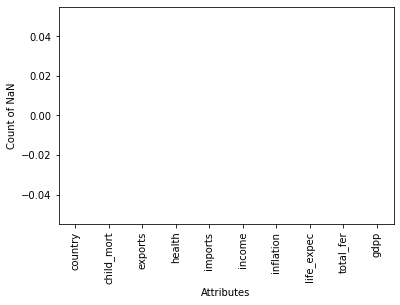

In [4]:
# Grafik missing value
pd.isnull(df).sum().plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

In [5]:
# Menampilakan jumlah missing value
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

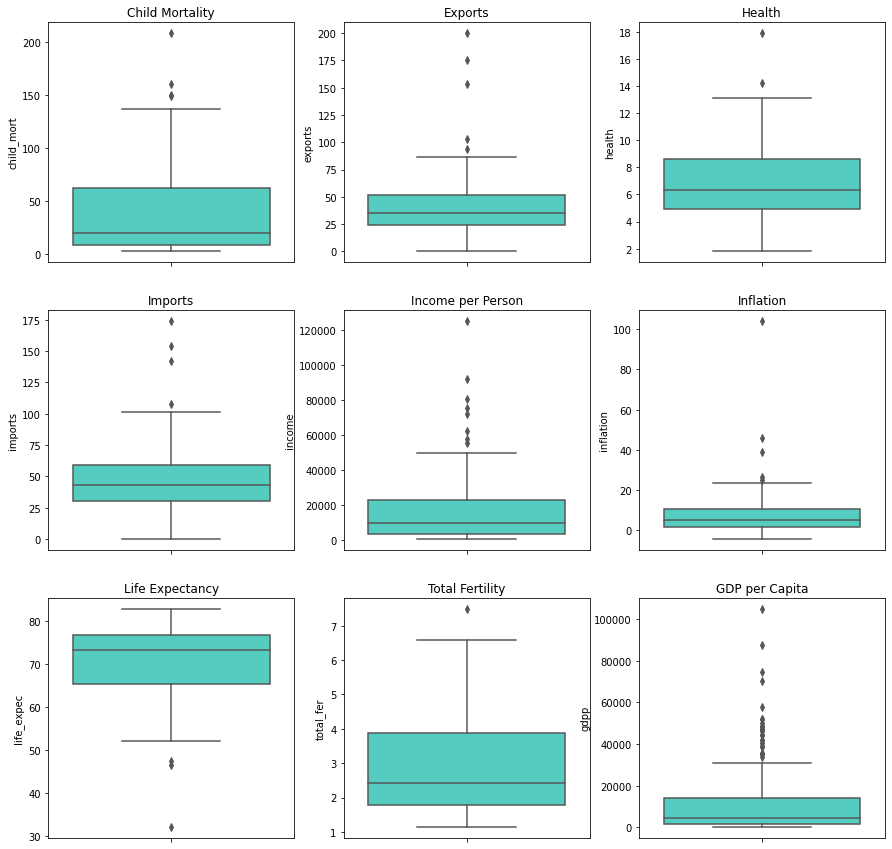

In [6]:
# Cek Outlier dengan membuat box plot
fig, axe = plt.subplots(3, 3, figsize=(15, 15))

axe[0, 0].set_title('Child Mortality')
box = sns.boxplot(y=df['child_mort'], ax=axe[0, 0], color='turquoise')

axe[0, 1].set_title('Exports')
box = sns.boxplot(y=df['exports'], ax=axe[0, 1], color='turquoise')

axe[0, 2].set_title('Health')
box = sns.boxplot(y=df['health'], ax=axe[0, 2], color='turquoise')

axe[1, 0].set_title('Imports')
box = sns.boxplot(y=df['imports'], ax=axe[1, 0], color='turquoise')

axe[1, 1].set_title('Income per Person')
box = sns.boxplot(y=df['income'], ax=axe[1, 1], color='turquoise')

axe[1, 2].set_title('Inflation')
box = sns.boxplot(y=df['inflation'], ax=axe[1, 2], color='turquoise')

axe[2, 0].set_title('Life Expectancy')
box = sns.boxplot(y=df['life_expec'], ax=axe[2, 0], color='turquoise')

axe[2, 1].set_title('Total Fertility')
box = sns.boxplot(y=df['total_fer'], ax=axe[2, 1], color='turquoise')

axe[2, 2].set_title('GDP per Capita')
box = sns.boxplot(y=df['gdpp'], ax=axe[2, 2], color='turquoise')

plt.show()

## Pra-Pemrosesan Data

In [7]:
# Penghapusan atribut nama country
data = df.drop(['country'],axis=1)

In [8]:
# Scaling Data dengan RobustScaler
scaling=RobustScaler()
scaled=scaling.fit_transform(data)

# Memasukkan hasil scaling ke dalam dataframe
scaledData = pd.DataFrame(scaled,columns=data.columns)

In [9]:
# Menampilkan dataset sebelum di-scaling
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
# Menampilkan dataset setelah di-scaling
scaledData.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.316620,-0.907441,0.342391,0.056042,-0.429416,0.453020,-1.469565,1.635492,-0.322877
1,-0.050139,-0.254083,0.062500,0.185639,-0.001543,-0.100671,0.278261,-0.364508,-0.044811
2,0.148561,0.123412,-0.584239,-0.416813,0.151196,1.197987,0.295652,0.230216,-0.015723
3,1.851439,0.990926,-0.942935,-0.014011,-0.208794,1.902685,-1.130435,1.798561,-0.088836
4,-0.167131,0.381125,-0.078804,0.546410,0.470044,-0.441834,0.321739,-0.134293,0.592767


## Algoritma Unsupervised (K-Means)

In [11]:
# Fungsi untuk menentukan centroid awal
def firstCentroids(df, k):
    centroids = []
    j = 18
    for i in range(k):
        centroid = df.apply(lambda x: float(x.sample(random_state=j)))
        centroids.append(centroid)
        j+=1
    return pd.concat(centroids, axis=1)

In [12]:
# Fungsi untuk menghitung jarak titik (Euclidean Distance)
def Euclidean(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [13]:
# Fungsi untuk menentukan centroid baru (Hitung Mean)
def newCentroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [14]:
# Algoritma untuk membuat model (Memanggil fungsi-fungsi yg sudah dibuat)
maxIter = 50
k = 3
centroids = firstCentroids(scaledData, k)
Oldcentroids = pd.DataFrame()
i = 0

while(i < maxIter and not centroids.equals(Oldcentroids)):
    Oldcentroids = centroids
    labels = Euclidean(scaledData, centroids)
    centroids = newCentroids(scaledData, labels, k)
    i += 1

In [15]:
# Menampilkan cluster dalam tabel
preds = labels
result = pd.DataFrame(df)
result['Cluster'] = preds
result

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [18]:
result.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [16]:
preds.value_counts()

1    109
0     35
2     23
dtype: int64

In [19]:
# Menyimpan output ke dalam excel
#result.to_excel('output.xlsx')

Link Output Excel: 

## Penentuan Nama Cluster

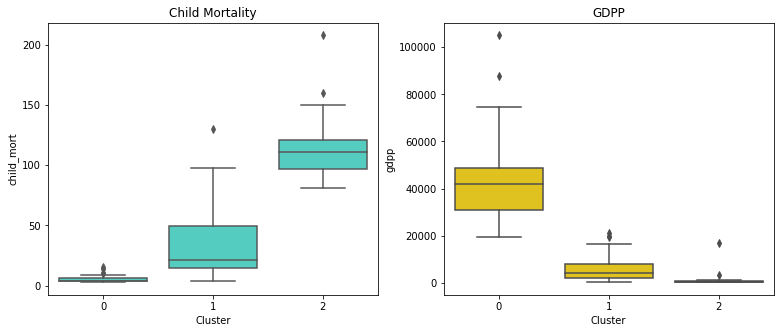

In [ ]:
# Mengetahui arti dari cluster
fig, ax = plt.subplots(1, 2, figsize = (13,5))

# Boxplot untuk child mortality dan cluster
plt.subplot(1,2,1)
sns.boxplot(x = result['Cluster'], y=result['child_mort'], color="#40e0d0");
plt.title('Child Mortality')

# Boxplot untuk gdpp dan cluster
plt.subplot(1,2,2)
sns.boxplot(x = result['Cluster'], y=result['gdpp'], color="#ffd700");
plt.title('GDPP')

plt.show()

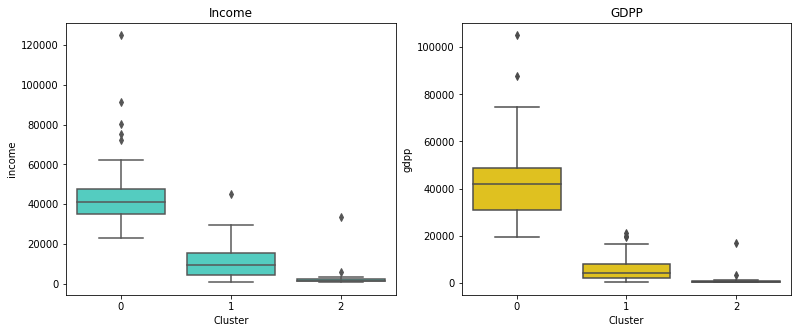

In [ ]:
# Mengetahui arti dari cluster
fig, ax = plt.subplots(1, 2, figsize = (13,5))

# Boxplot untuk income dan cluster
plt.subplot(1,2,1)
sns.boxplot(x = result['Cluster'], y=result['income'], color="#40e0d0");
plt.title('Income')

# Boxplot untuk gdpp dan cluster
plt.subplot(1,2,2)
sns.boxplot(x = result['Cluster'], y=result['gdpp'], color="#ffd700");
plt.title('GDPP')

plt.show()

Dari 4 grafik cluster di atas kita dapat menyimpulkan bahwa


*   Negara yang dengan Child_mort yang tinggi, GDPP yang rendah dan income yang rendah (Pengukuran tingkat pertumbuhan tahunan dari Total GDP) adalah negara yang miskin.
*   Negara yang memiliki angka Child_mort rendah, GDPP tinggi dan income tinggi adalah negara maju

Sehingga dapat disimpulkan:


*   Cluster 0 = negara maju/tidak membutuhkan bantuan
*   Cluster 1 = negara berkembang/mungkin butuh bantuan
*   Cluster 2 = negara miskin/membutuhkan bantuan






## Evaluasi

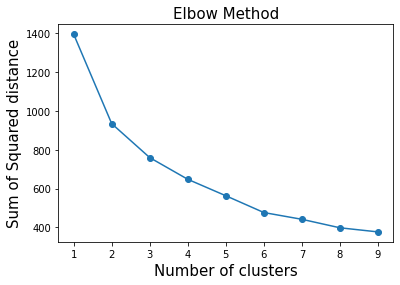

In [ ]:
# Evaluasi menggunakan plot elbow
from sklearn.cluster import KMeans

SSE=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(scaledData)
    SSE.append(kmean.inertia_)
    
plt.plot(K,SSE,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Banyak Cluster Optimal: 3


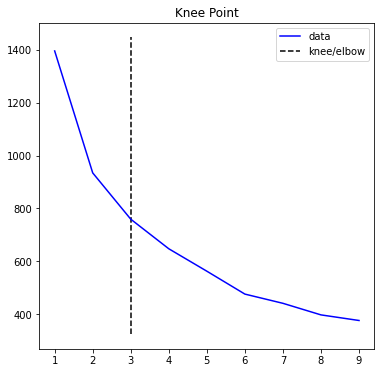

In [ ]:
# Src https://www.kaggle.com/code/kevinarvai/knee-elbow-point-detection
!pip install kneed
from kneed import KneeLocator

# Menggunakan kneed untuk mengetahui nilai cluster terbaik
elbow = KneeLocator(range(1, 10), SSE[0:len(SSE)], curve="convex", direction="decreasing")
print(f"Banyak Cluster Optimal: {elbow.elbow}")
elbow.plot_knee()

## Referensi


*   https://www.kaggle.com/code/dikshabhati2002/k-means-and-hierarchical-clustering/notebook#K-Means-Clustering
*   https://www.youtube.com/watch?v=lX-3nGHDhQg
*   https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical 
*   https://www.youtube.com/watch?v=vtuH4VRq1AU
*   https://analyticsarora.com/k-means-for-beginners-how-to-build-from-scratch-in-python/






